#Heart Disease Detection

##Importing essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading The Dtaset

In [2]:
df=pd.read_csv('./heart.csv')

Exploring the data

In [3]:
df.head(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
df.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
923,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
924,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
925,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
926,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
927,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0
928,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
929,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
930,39,M,ATA,120,204,0,Normal,145,N,0.0,Up,0
931,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
932,42,F,NAP,115,211,0,ST,137,N,0.0,Up,0


#Features


1.   Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

# Target
* HeartDisease: output class [1: heart disease, 0: Normal]





Size and the shape of the data

In [5]:
df.shape

(933, 12)

Essential Values of the dataset

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000
mean,53.375134,132.389068,199.311897,0.229368,136.808146,0.880600,0.549839
std,9.455152,18.439548,108.731894,0.420652,25.429374,1.062933,0.497777
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,175.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Check for missing Values

In [7]:
missing_count = df.isnull().sum()
print(missing_count)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


##So there is no missing Values in this dataset

Checking duplicate rows

In [8]:
df1 = df[~df.duplicated()]
print(df.shape)
print(df1.shape)

(933, 12)
(918, 12)


As we can see here,there are some duplicate rows in the dataset

> Removing Duplicate rows and form a unique row dataset

In [9]:
df = df[~df.duplicated()]
print(df.shape)

(918, 12)


Checking Unique values of each variable

In [10]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

##So we can see that

* Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope, HeartDisease are **Categorical variables**
* Age, RestingBP, Cholesterol, MaxHR, Oldpeak are **Numerical Variables**

Counts of categorical variables

In [11]:
categorical_variables = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for t in categorical_variables:
  print(df[t].value_counts().reset_index(name='Count'))
  print()


  Sex  Count
0   M    725
1   F    193

  ChestPainType  Count
0           ASY    496
1           NAP    203
2           ATA    173
3            TA     46

   FastingBS  Count
0          0    704
1          1    214

  RestingECG  Count
0     Normal    552
1        LVH    188
2         ST    178

  ExerciseAngina  Count
0              N    547
1              Y    371

  ST_Slope  Count
0     Flat    460
1       Up    395
2     Down     63



##Here are some plots of the data counts for Categorical Variables

<Axes: xlabel='Sex'>

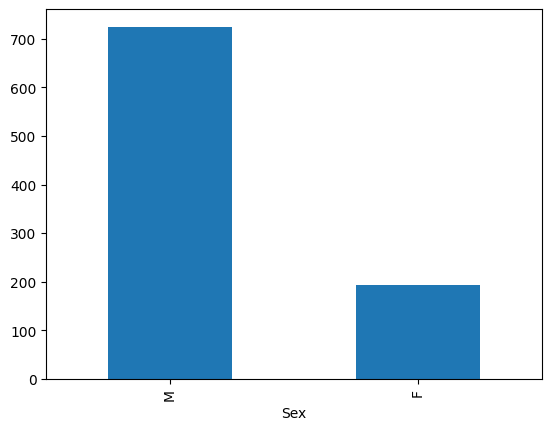

In [12]:
df.Sex.value_counts().plot(kind='bar')

<Axes: xlabel='ChestPainType'>

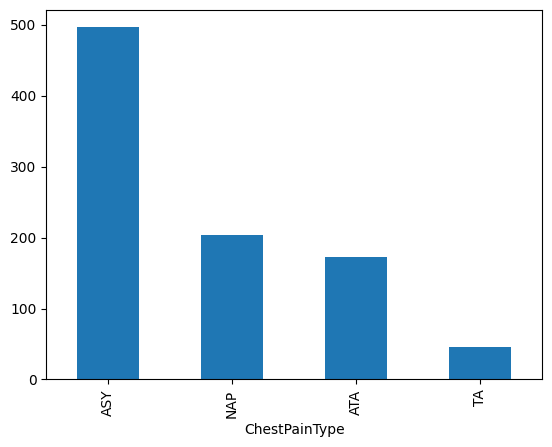

In [60]:
df.ChestPainType.value_counts().plot(kind='bar')

<Axes: xlabel='FastingBS'>

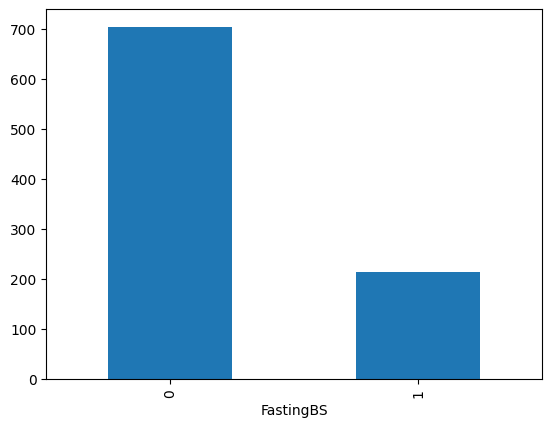

In [61]:
df.FastingBS.value_counts().plot(kind='bar')

###As we can see in the data of the dataset,Some data have String values for data.We have to encode them in order to identify them to the model.

> Encoding String values to Integer Values

In [13]:
CATEGORICAL_COLUMNS = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
NUMERIC_COLUMNS = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})

df['ChestPainType'] = df['ChestPainType'].map({'ASY': 0, 'NAP': 1, 'ATA': 2, 'TA': 3})

df['RestingECG'] = df['RestingECG'].map({'Normal': 0, 'LVH': 1, 'ST': 2})

df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})

df['ST_Slope'] = df['ST_Slope'].map({'Flat': 0, 'Up': 1, 'Down': 2})

print(df.head())


   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              2        140          289          0           0   
1   49    0              1        160          180          0           0   
2   37    1              2        130          283          0           2   
3   48    0              0        138          214          0           0   
4   54    1              1        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         1             0  
1    156               0      1.0         0             1  
2     98               0      0.0         1             0  
3    108               1      1.5         0             1  
4    122               0      0.0         1             0  


In [63]:
for t in categorical_variables:
  print(df[t].value_counts().reset_index(name='Count'))
  print()

   Sex  Count
0    1    725
1    0    193

   ChestPainType  Count
0              0    496
1              1    203
2              2    173
3              3     46

   FastingBS  Count
0          0    704
1          1    214

   RestingECG  Count
0           0    552
1           1    188
2           2    178

   ExerciseAngina  Count
0               0    547
1               1    371

   ST_Slope  Count
0         0    460
1         1    395
2         2     63



In [14]:
df.head(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,1,160,180,0,0,156,0,1.0,0,1
2,37,1,2,130,283,0,2,98,0,0.0,1,0
3,48,0,0,138,214,0,0,108,1,1.5,0,1
4,54,1,1,150,195,0,0,122,0,0.0,1,0
5,39,1,1,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,0,140,207,0,0,130,1,1.5,0,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


#Data visualization for Numerical Variables

In [15]:
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

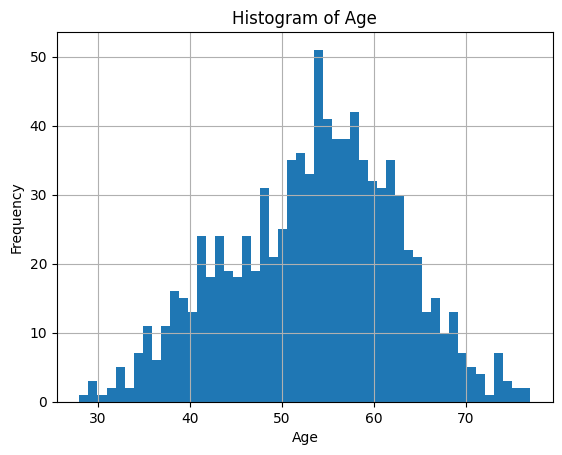

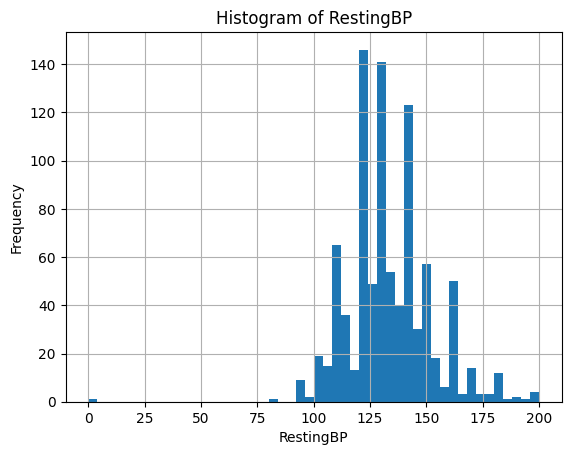

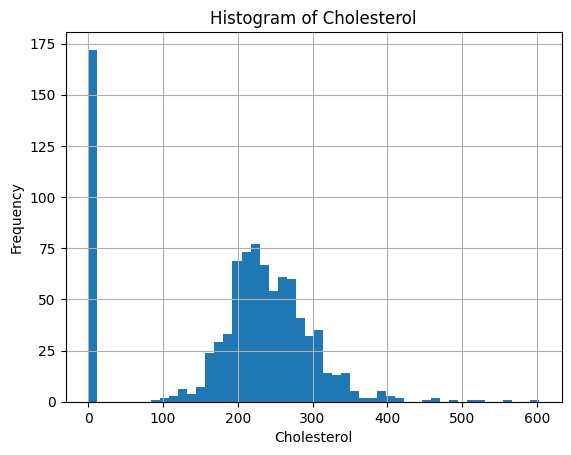

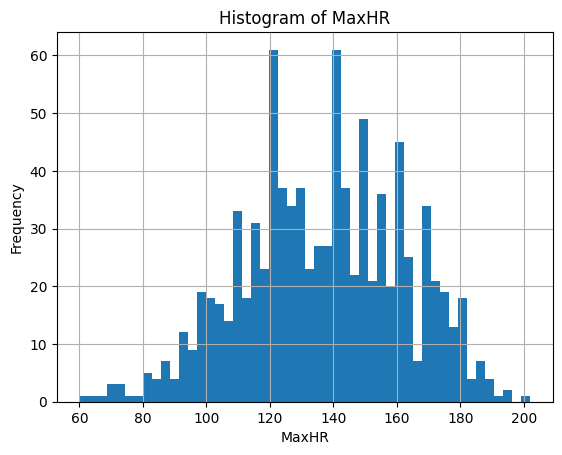

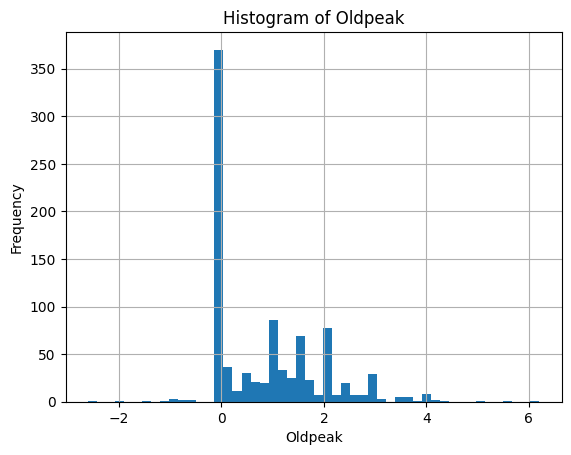

In [16]:
for numeric_Val in numeric_columns:
    plt.figure()
    df[numeric_Val].hist(bins=50)
    plt.title("Histogram of " + numeric_Val)
    plt.xlabel(numeric_Val)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


##By seeing those plot we can see that there are some outliers in some varibles.
These outliers may lead our model to bad predictions,So its better to get rid of them before continuing to modelling


we wish to use Techniques like IQR method to remove outliers from the variables.

##Scaling Features
Scaling is important because it helps to bring all features to the same scale or range.
So any feature have no unwanted weight over another.

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numericaldf = df[numeric_columns]
scaled_df = pd.DataFrame(scaler.fit_transform(numericaldf), columns = scaler.get_feature_names_out())

In [18]:
scaled_df.head(10)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,0.244898,0.70,0.479270,0.788732,0.295455
1,0.428571,0.80,0.298507,0.676056,0.409091
2,0.183673,0.65,0.469320,0.267606,0.295455
3,0.408163,0.69,0.354892,0.338028,0.465909
4,0.530612,0.75,0.323383,0.436620,0.295455
5,0.224490,0.60,0.562189,0.774648,0.295455
6,0.346939,0.65,0.393035,0.774648,0.295455
7,0.530612,0.55,0.344942,0.577465,0.295455
8,0.183673,0.70,0.343284,0.492958,0.465909
9,0.408163,0.60,0.470978,0.422535,0.295455


##Correlation Matrix

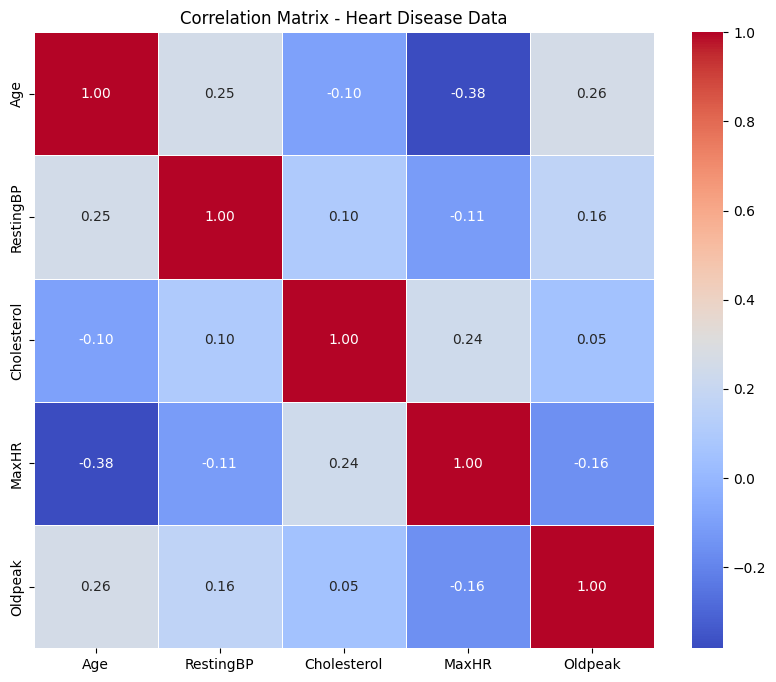

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numeric columns
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Assuming your DataFrame representing heart disease data is named heart_disease_df
correlation_matrix_heart = df[numeric_columns].corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_heart, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Heart Disease Data')
plt.savefig('heart_disease_correlation_mat.png')
plt.show()


As we can see in the corrrelation matrix there is no significant correlation among any feature in the dataset, **So it is essential to use all the Features for training.**